<a href="https://colab.research.google.com/github/VioletKarasik/Colaboratory/blob/main/midpwd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Описание датасета

The dataset is related to red variant of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines.

Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
Output variable (based on sensory data):
   12 - quality (score between 0 and 10)
   

source: https://archive.ics.uci.edu/dataset/186/wine+quality

###Импорт необходимых библиотек

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.rc("font", size=14)

###Загрузка датасета

In [ ]:
WineQuality = pd.read_csv('winequality-red.csv', sep=';')
WineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###Предварительный анализ данных

In [ ]:
WineQuality = WineQuality.dropna()
print(WineQuality.shape)
WineQuality.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(WineQuality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [ ]:
print(list(WineQuality.columns))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


###Визуализация данных: диаграмма рассеяния

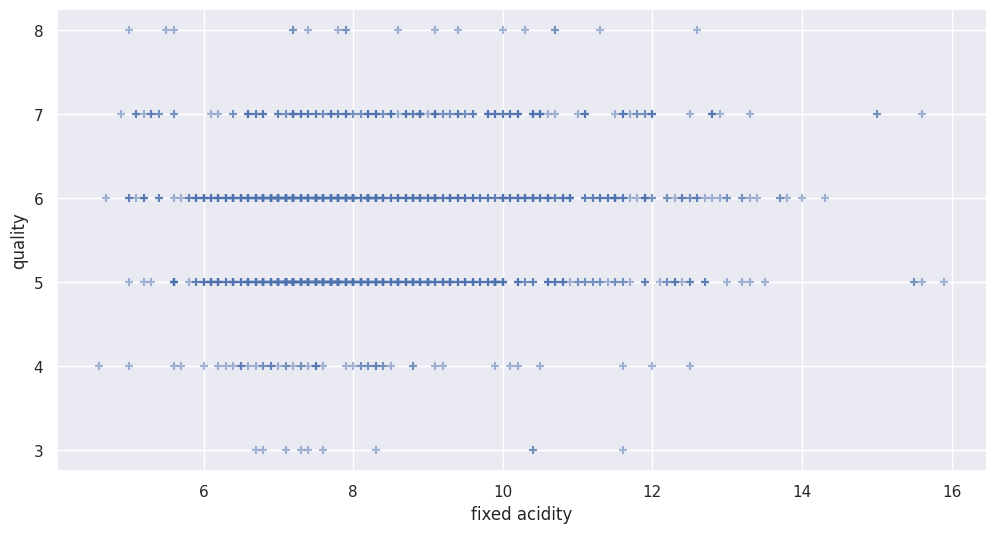

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[0]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()


Фиксированная кислотность (Fixed Acidity): На графике видно, что большинство точек сгруппированы вокруг средних значений фиксированной кислотности и качества. Это означает, что вина с умеренным уровнем фиксированной кислотности обычно имеют средние оценки качества. Однако не наблюдается явной корреляции между фиксированной кислотностью и качеством вина, так как точки данных разбросаны без четкой тенденции.

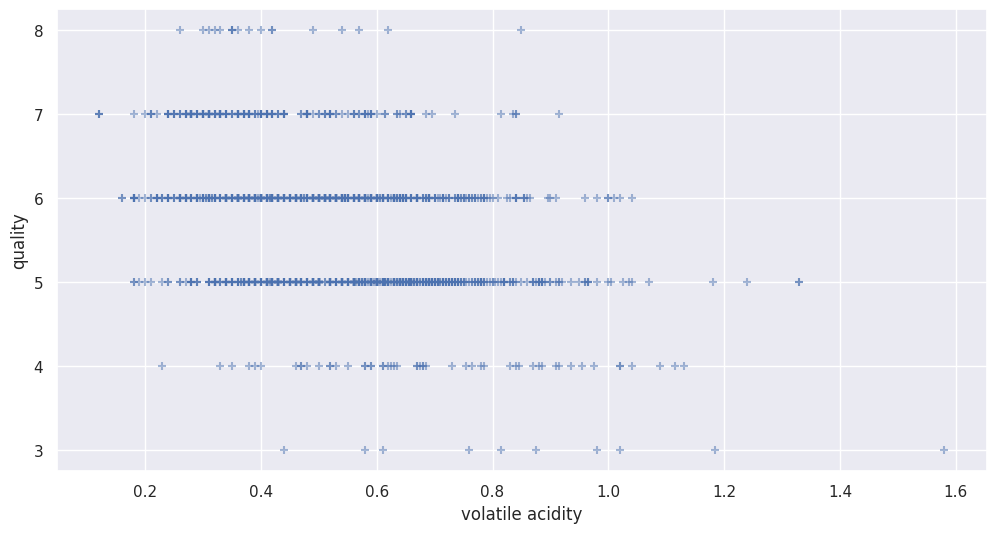

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[1]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Летучая кислотность (Volatile Acidity): График показывает тенденцию, что более высокие оценки качества связаны с более низким уровнем летучей кислотности. Вина с меньшим содержанием летучей кислотности обычно имеют более высокую оценку качества.

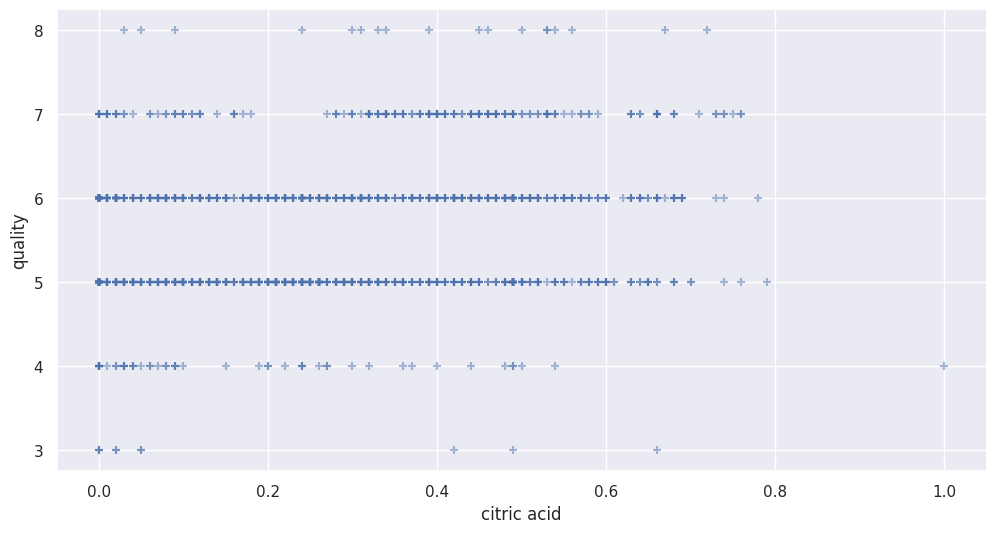

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[2]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Лимонная кислота (Citric Acid): График показывает закономерность, что более высокие оценки качества связаны с более низким уровнем лимонной кислоты. То есть продукты с умеренным содержанием лимонной кислоты обычно имеют более высокую оценку качества.

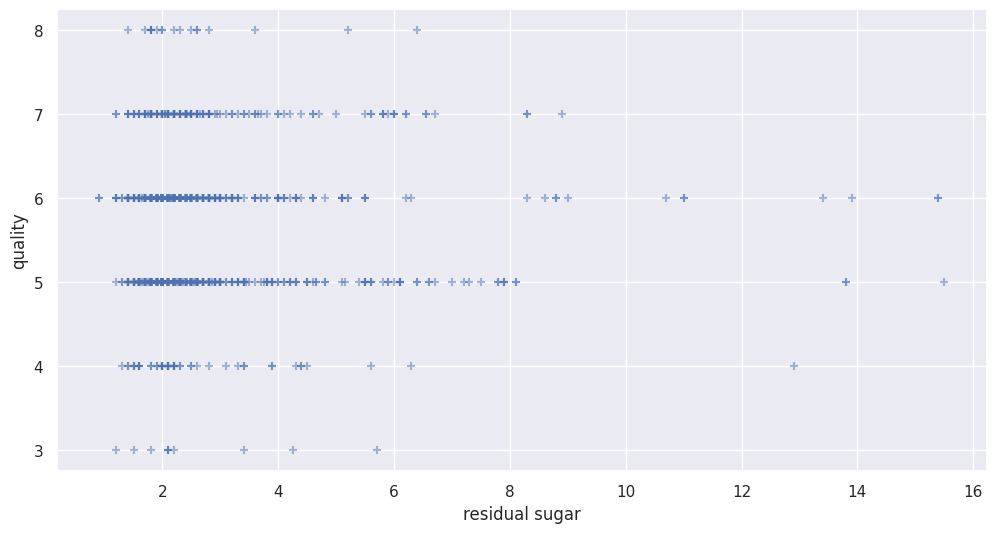

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[3]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Остаточный сахар (Residual Sugar): График показывает закономерность, что более высокие оценки качества не обязательно связаны с более высоким уровнем остаточного сахара. Вино с умеренным содержанием остаточного сахара могут иметь более высокую оценку качества.

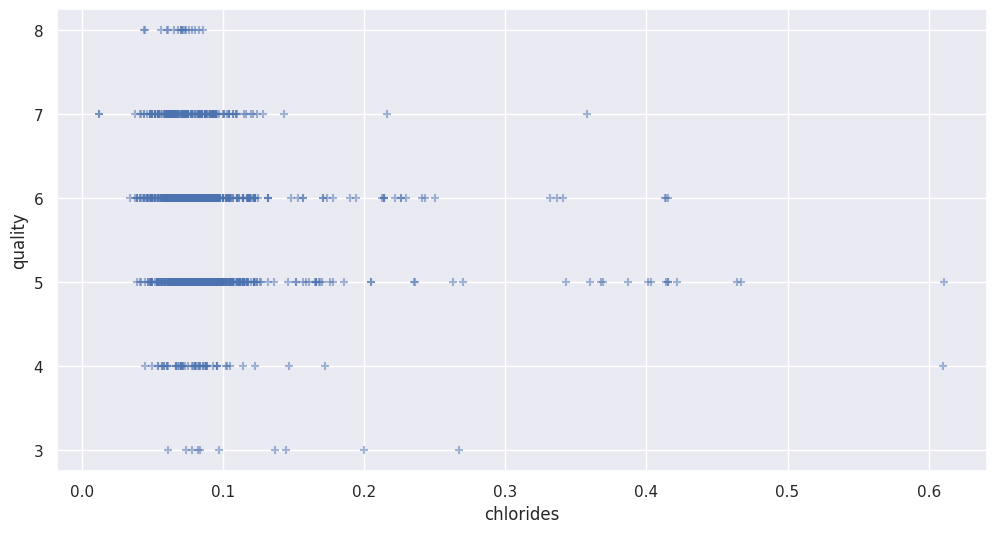

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[4]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Хлориды (Chlorides): На этой диаграмме рассеяния показана зависимость между уровнем хлоридов и качеством вина. С увеличением уровня хлоридов качество обычно снижается.

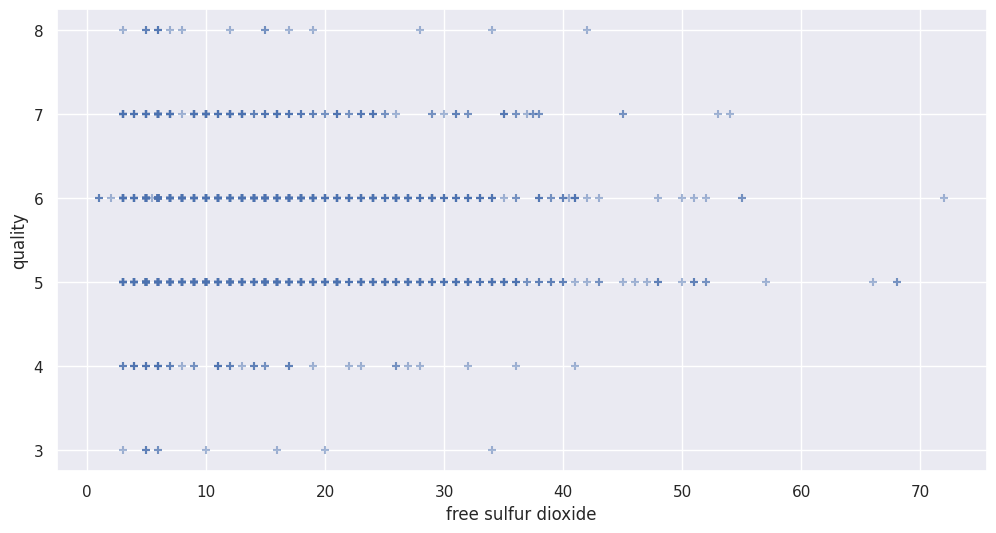

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[5]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Свободный диоксид серы (free sulfus dioxide): На этой диаграмме рассеяния показана зависимость между качеством вина и его содержанием свободного диоксида серы. Бысокие оценки качества связаны с определенным диапазоном свободного диоксида серы.

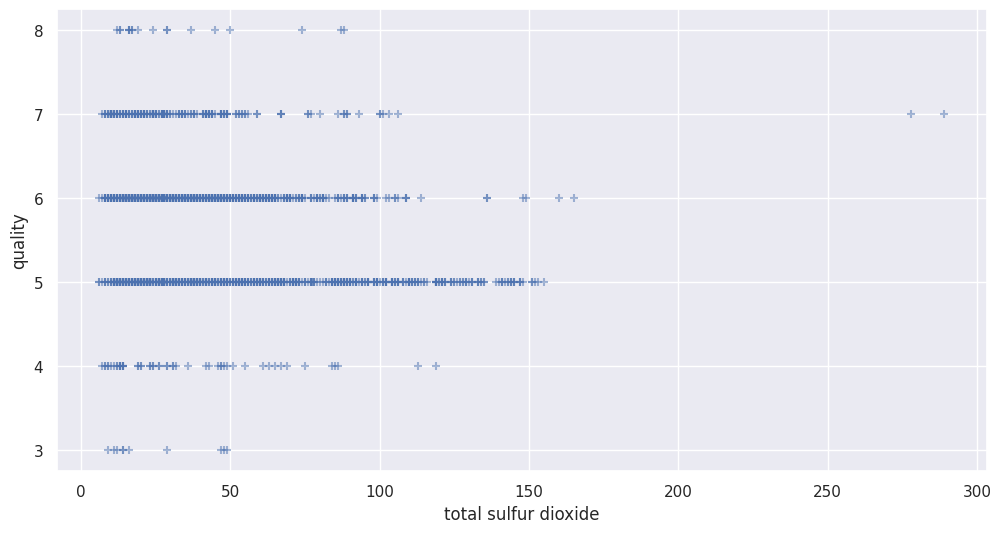

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[6]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Общее содержание диоксида серы (total sulfus dioxide): На этой диаграмме рассеяния показана зависимость между качеством вина и его содержанием свободного диоксида серы. С увеличением общего содержания диоксида серы качество обычно снижается.

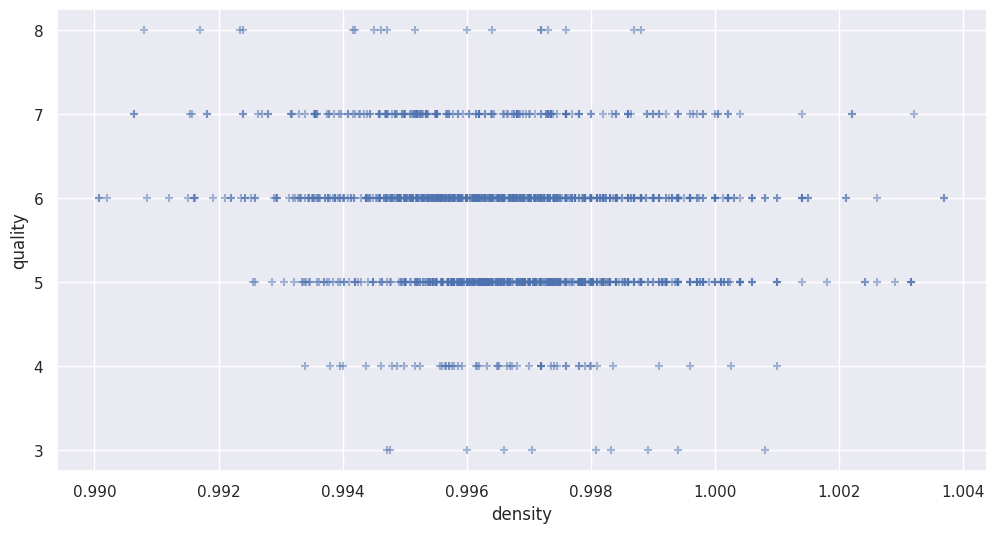

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[7]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Плотность (Density): На этой диаграмме рассеяния показана зависимость между качеством и плотностью вина. С увеличением плотности качество обычно сосредотачивается на определенных уровнях.

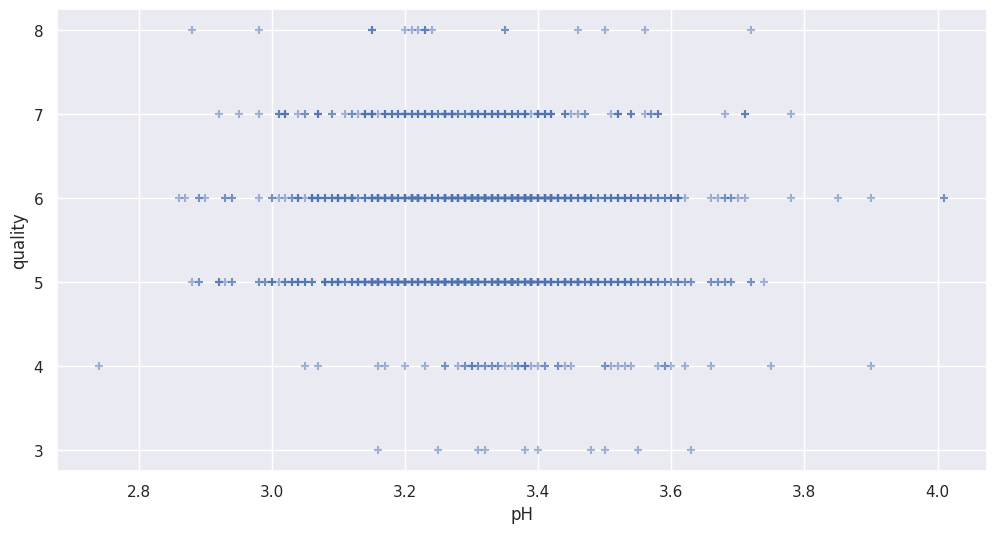

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[8]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Водородный показатель (Power of Hydrogen): На этой диаграмме рассеяния показана зависимость между качеством и уровнем pH в вине. С увеличением уровня pH качество обычно сосредотачивается на определенных уровнях.

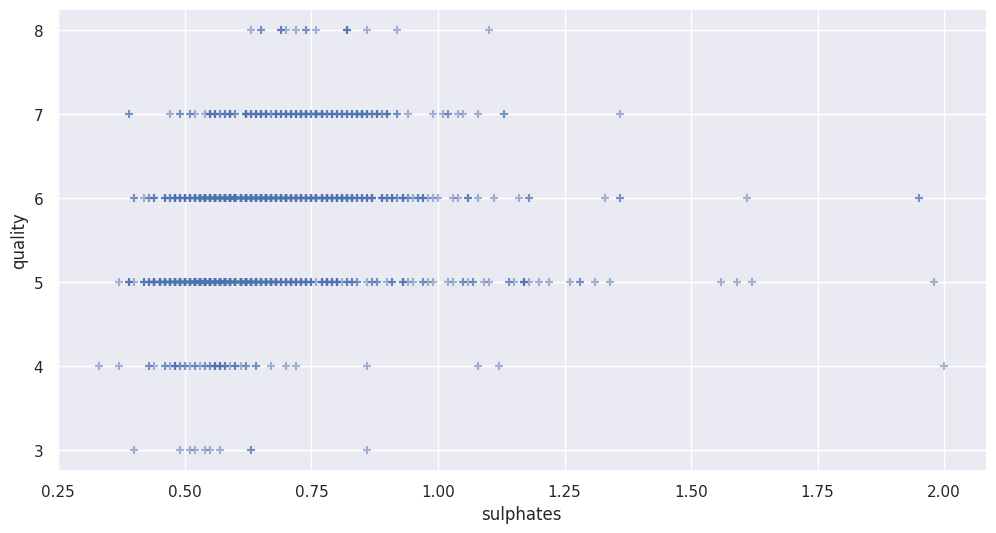

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[9]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Сульфаты (Sulphates): На этой диаграмме рассеяния показана зависимость между качеством вина и его содержанием сульфатов. С увеличением уровня сульфатов качество обычно снижается.

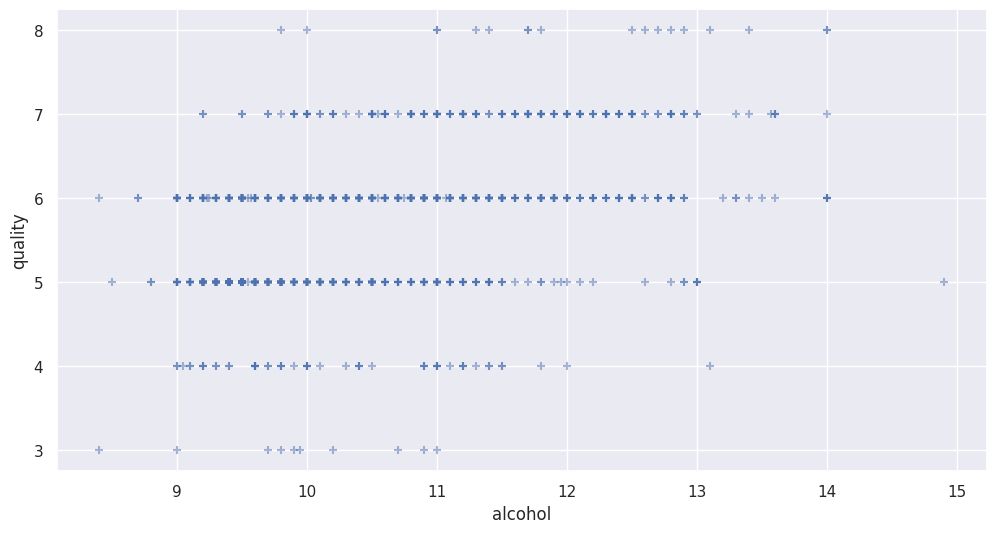

In [ ]:
# Выбор столбцов для прогнозирования
x = WineQuality.columns[10]
y = WineQuality.columns[11]

# Визуализация данных
plt.scatter(WineQuality[x], WineQuality[y], marker="+", alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

Алкоголь (Alcohol): На этой диаграмме рассеяния показана зависимость между содержанием алкоголя и качеством вина. Вина с содержанием алкоголя около 10-12% обычно имеют более высокую оценку качества.

# Химические свойства и качество вина:
1. **Алкоголь:** Вина с 10-12% алкоголя обычно имеют более высокую оценку качества.
2. **Летучая кислотность:** Более низкие уровни летучей кислотности связаны с более высоким качеством.
3. **Лимонная кислота:** Умеренное содержание лимонной кислоты может быть связано с более высокой оценкой качества.
4. **Остаточный сахар:** Более высокие оценки качества не всегда связаны с более высоким уровнем остаточного сахара.
5. **Хлориды:** Более высокие уровни хлоридов обычно связаны с низким качеством вина.
6. **Свободный диоксид серы:** Умеренное содержание свободного диоксида серы может быть связано с более высокой оценкой качества.
7. **Общий диоксид серы:** Меньшее содержание общего диоксида серы может быть связано с более высоким качеством.
8. **Плотность:** Вина с определенной плотностью могут иметь более высокую оценку.
9. **pH:** Вина с умеренным pH обычно имеют более высокую оценку.
10. **Сульфаты:** Большее содержание сульфатов может быть связано с более высоким качеством.

В итоге, чем меньше химикатов и больше натуральности - тем выше качество вина.

###Корреляционный анализ

In [ ]:
corr_matrix=WineQuality.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

###Матрица диаграмм рассеяния для выбранных признаков

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


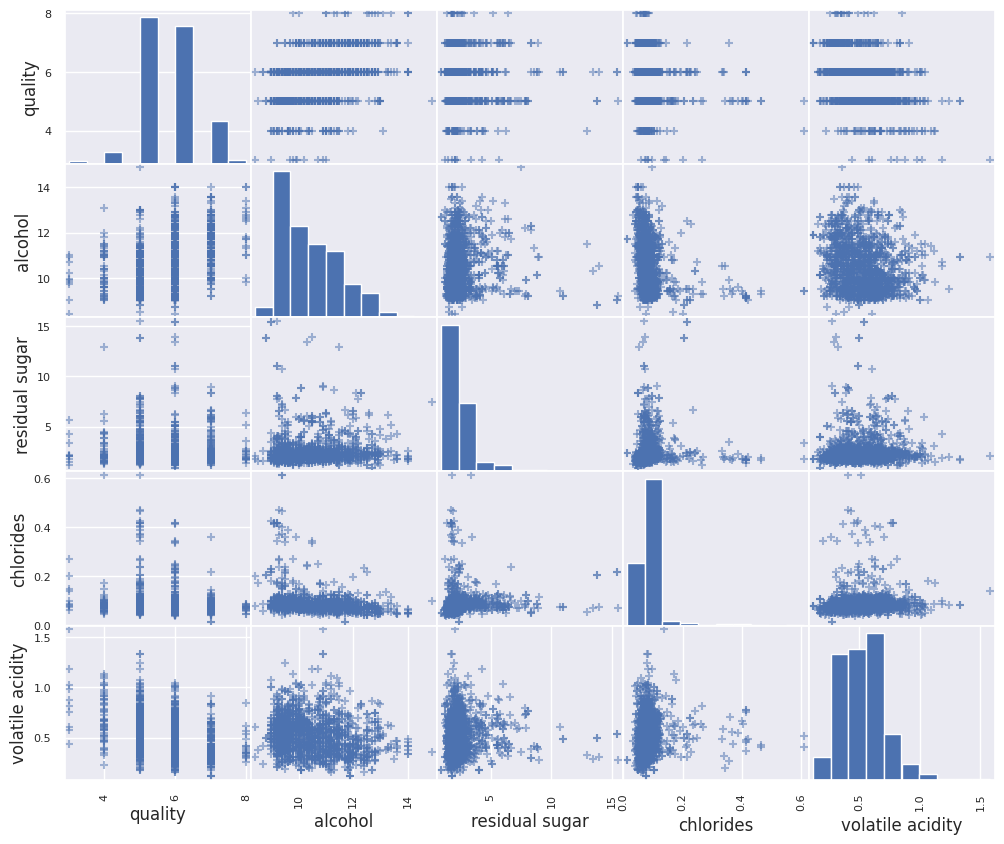

In [ ]:
attr = ["quality", "alcohol", "residual sugar", "chlorides", "volatile acidity"]
scatter_matrix(WineQuality[attr], figsize=(12,10), alpha=0.5, marker="+")
plt.show()

###Тепловая карта корреляции

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.26,0.67,0.11,0.09,0.15,0.11,0.67,0.68,0.18,0.06,0.12
volatile acidity,0.26,1.00,0.55,0.00,0.06,0.01,0.08,0.02,0.23,0.26,0.20,0.39
citric acid,0.67,0.55,1.00,0.14,0.20,0.06,0.04,0.36,0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,0.27,0.37,0.22,0.13
free sulfur dioxide,0.15,0.01,0.06,0.19,0.01,1.00,0.67,0.02,0.07,0.05,0.07,0.05
total sulfur dioxide,0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,0.07,0.04,0.21,0.19
density,0.67,0.02,0.36,0.36,0.20,0.02,0.07,1.00,0.34,0.15,0.50,0.17
pH,0.68,0.23,0.54,0.09,0.27,0.07,0.07,0.34,1.00,0.20,0.21,0.06
sulphates,0.18,0.26,0.31,0.01,0.37,0.05,0.04,0.15,0.20,1.00,0.09,0.25


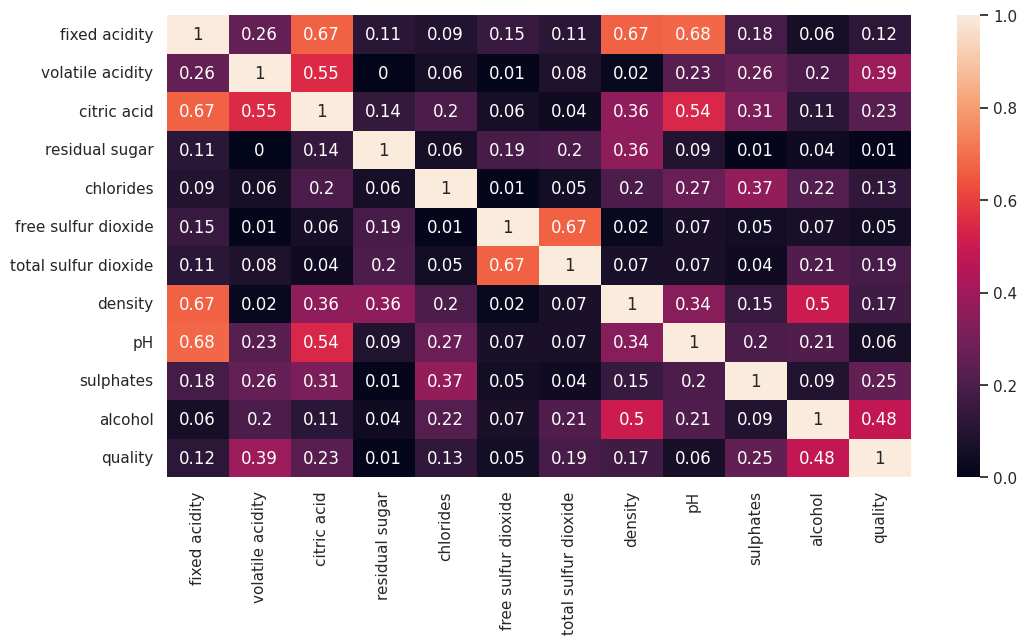

In [ ]:
cor_matrix = WineQuality.corr().abs().round(2)
sns.set(rc={'figure.figsize':(12,6)})
sns.heatmap(data=cor_matrix , annot=True)
cor_matrix

По результатам таблицы можно сделать вывод о наличии корреляции между различными химическими свойствами и качеством вина. Интенсивность цвета в каждой ячейке представляет силу и направление (положительное или отрицательное) корреляции между переменными.

###Подготовка данных для моделирования

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [ ]:
print(WineQuality.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
X = WineQuality.loc[:, WineQuality.columns != 'quality']

In [ ]:
Y = WineQuality['quality']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


###Обучение модели и оценка ее точности

In [ ]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [ ]:
Y_pred = pipeline.predict(X_test)

In [ ]:
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

RMSE: 0.6200574149384268
MSE: 0.38447119782012434
MAE: 0.4696330928661115


###Визуализация результатов

Text(0, 0.5, 'Real values')

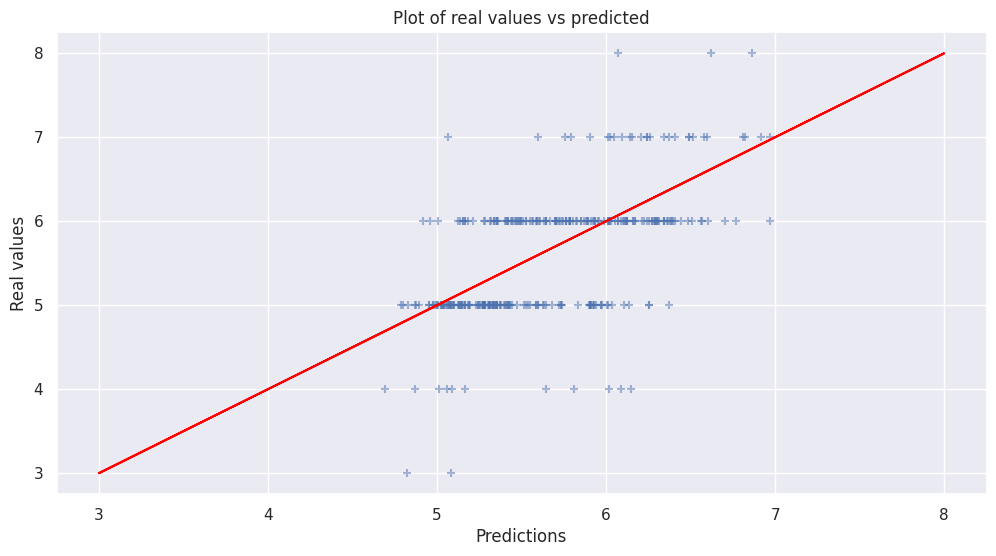

In [ ]:
plt.scatter(Y_pred, Y_test, alpha=0.5, marker="+")
plt.plot(Y_test, Y_test, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')